In [1]:
import sys
import os

current_dir = os.getcwd()

src_directory = current_dir + "/../src/"

if src_directory not in sys.path:
    sys.path.append(src_directory)

import Bootstrap as Bt
import numpy as np
import matplotlib.pyplot as plt
from tueplots import bundles
from tueplots.constants.color import rgb
from DataLoaderClass import DataLoader
import matplotlib.colors as mcolors


dataloader = DataLoader()

At first the data gets loaded by using the implemented DataLoader. The next step is to sum over the kids and years to get the total number of divorces for every marriage duration from the years 1997 to 2022.

[0.00674281 0.02906747 0.04288125 0.04730548 0.05717297 0.05833193
 0.05508708 0.05154105 0.04792404 0.04525126 0.04224    0.03953151
 0.03737016 0.03524227 0.03353124 0.03180561 0.03014332 0.02865892
 0.02725762 0.02582712 0.02410621 0.02255645 0.02090068 0.01910138
 0.01763158 0.12279058]
[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26]
[1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022]


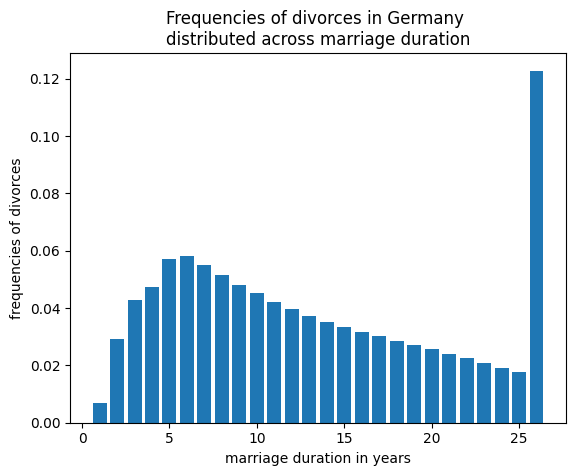

In [9]:
data_array, years, durations, kids = dataloader.load_data(years_to_drop=[1997])
data_array = data_array.swapaxes(0, 1).sum(axis=2).sum(1)

sum_all_divs = data_array.sum()
probs_per_duration = data_array / sum_all_divs

print(probs_per_duration)
print(durations)
print(years)

plt.bar(durations, probs_per_duration)
plt.xlabel("marriage duration in years")
plt.ylabel("frequencies of divorces")
plt.title("Frequencies of divorces in Germany \ndistributed across marriage duration")
plt.show()

[0.00674281 0.02906747 0.04288125 0.04730548 0.05717297 0.05833193
 0.05508708 0.05154105 0.04792404 0.04525126 0.04224    0.03953151
 0.03737016 0.03524227 0.03353124 0.03180561 0.03014332 0.02865892
 0.02725762 0.02582712 0.02410621 0.02255645 0.02090068 0.01910138
 0.01763158 0.12279058]
[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26]
mean:  13.268147041436599
median:  12
mode:  26


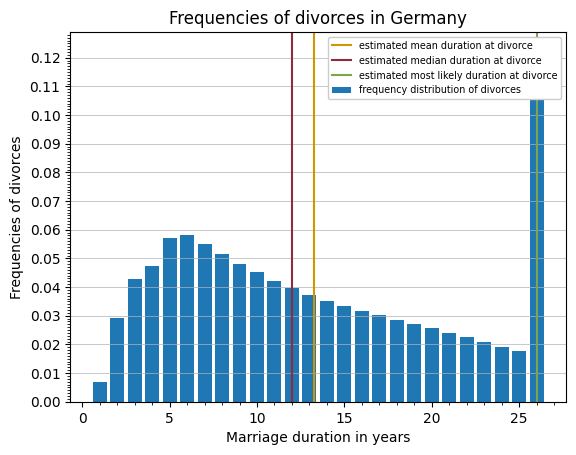

In [10]:
sum_all_divs = data_array.sum()
probs_per_duration = data_array / sum_all_divs

print(probs_per_duration)
print(durations)

mean = np.sum(durations * probs_per_duration)
median = durations[np.argmax(np.cumsum(probs_per_duration) >= 0.5)]
mode = durations[np.argmax(probs_per_duration)]

print("mean: ", mean)
print("median: ", median)
print("mode: ", mode)

fig, ax = plt.subplots()

ax.axvline(mean, color=rgb.tue_orange, lw=1.5, label="estimated mean duration at divorce")
ax.axvline(median, color=rgb.tue_red, lw=1.5, label="estimated median duration at divorce")
ax.axvline(mode, color=rgb.tue_green, lw=1.5, label="estimated most likely duration at divorce")

ax.bar(durations, probs_per_duration, label="frequency distribution of divorces")
ax.xaxis.set_major_locator(plt.MultipleLocator(5))
ax.xaxis.set_minor_locator(plt.MultipleLocator(1))
ax.yaxis.set_major_locator(plt.MultipleLocator(.01))
ax.yaxis.set_minor_locator(plt.MultipleLocator(.001))
ax.grid(axis="y", which="major", color=rgb.tue_gray, linewidth=0.5)
plt.xlabel("Marriage duration in years")
plt.ylabel("Frequencies of divorces")
plt.title("Frequencies of divorces in Germany")
plt.legend(loc="upper right", framealpha=1, facecolor="white", frameon=True, fontsize="x-small")
plt.show()

100%|██████████| 100/100 [00:00<00:00, 2082.20it/s]


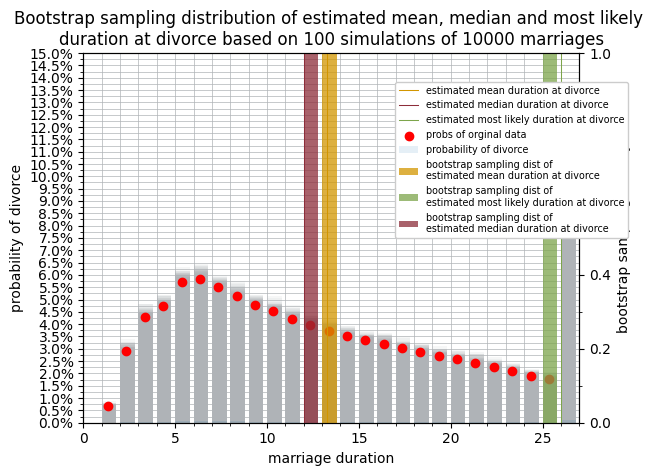

In [11]:
num_simulations = 100
batch_size = 10000

means, medians, most_probables, estimates = Bt.bootstrap(num_simulations, batch_size, durations, probs_per_duration)

fig, ax = plt.subplots()

for i in np.arange(num_simulations):
    ax.bar(durations, height=estimates[i, :] * 100, width=0.8, color=rgb.tue_gray, lw=0.5,
           alpha=0.1, align="edge")

ax2 = ax.twinx()
ax2.hist(means, bins=durations, color=rgb.tue_orange, lw=0.5, width=0.8, alpha=0.75,
         label="bootstrap sampling dist of \nestimated mean duration at divorce", align="mid", density=True)
ax2.hist(most_probables, bins=durations, color=rgb.tue_green, lw=0.5, width=0.8, alpha=0.75,
         label="bootstrap sampling dist of \nestimated most likely duration at divorce", align="mid", density=True)
ax2.hist(medians, bins=durations, color=rgb.tue_red, lw=0.5, width=0.8, alpha=0.75,
         label="bootstrap sampling dist of \nestimated median duration at divorce", align="mid", density=True)
ax2.set_ylim([0, 1])
ax2.yaxis.set_major_locator(plt.MultipleLocator(0.2))
ax2.yaxis.set_minor_locator(plt.MultipleLocator(0.1))
ax2.set_ylabel("bootstrap sampling density")

ax.axvline(mean, color=rgb.tue_orange, lw=0.75, label="estimated mean duration at divorce")
ax.axvline(median, color=rgb.tue_red, lw=0.75, label="estimated median duration at divorce")
ax.axvline(mode, color=rgb.tue_green, lw=0.75, label="estimated most likely duration at divorce")

ax.scatter(durations + 0.35, probs_per_duration * 100, color='red', label="probs of orginal data")
ax.bar(durations, probs_per_duration, width=0.8, color=rgb.tue_blue, lw=0.5,
       alpha=0.1, label="probability of divorce", align="edge")

ax.set_xlabel("marriage duration")
ax.set_ylabel("probability of divorce")
ax.set_ylim([0, 15])
ax.yaxis.set_major_locator(plt.MultipleLocator(.5))
ax.yaxis.set_minor_locator(plt.MultipleLocator(.25))
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, loc: f"{x:,.1f}%"))
ax.xaxis.set_major_locator(plt.MultipleLocator(5))
ax.xaxis.set_minor_locator(plt.MultipleLocator(1))

ax.grid(axis="both", which="both", color=rgb.tue_gray, linewidth=0.5)
ax.set_axisbelow(True)
fig.legend(loc=[0.6, 0.5], framealpha=1, facecolor="white", frameon=True, fontsize="x-small")
ax.set_title(f"Bootstrap sampling distribution of estimated mean, median and most likely \nduration at divorce based on "
             f"{num_simulations} simulations of {batch_size} marriages")
ax.set_xlim([0, 27])

plt.show()

Not good estimator for most-likely duration. Need to drop last duration category.

The last peak is due to the fact that all divorces with a marriage duration bigger than or equal to 26 years were accumulated in the data set. 
To calculate the probability one gets divorced after a certain amount of years, we have no other options than to drop the last bucket of data points.
If we included the points for the analysis, we would get false values for estimated values like the mean. Therefore, we make the argument, that we 
only concentrate on marriage durations from less than two years to 25 years. 

The code below drops the last bucket and plots the probability again along with mean, median and the mode (most likely marriage duration until getting
divorced).

[0.00768666 0.0331363  0.0488837  0.05392724 0.06517597 0.06649715
 0.0627981  0.05875569 0.05463238 0.05158547 0.0481527  0.04506508
 0.04260118 0.04017543 0.0382249  0.03625772 0.03436275 0.03267056
 0.03107311 0.02944237 0.02748057 0.02571387 0.02382633 0.02177517
 0.02009962]
[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25]
mean:  11.485959633305647
median:  10
mode:  6


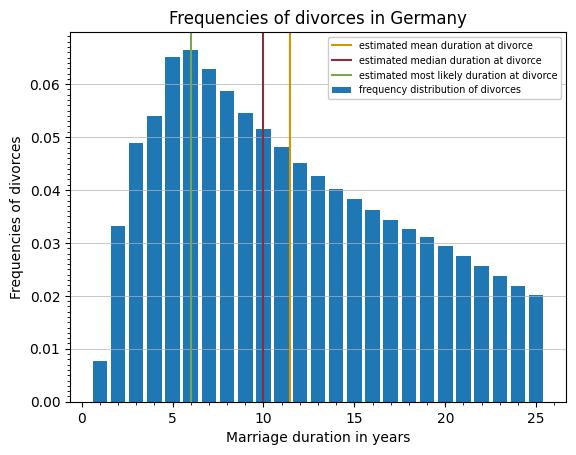

In [12]:
data_array_corrected = data_array[:-1]
durations_corrected = durations[:-1]

sum_all_divs = data_array_corrected.sum()
probs_per_duration = data_array_corrected / sum_all_divs

print(probs_per_duration)
print(durations_corrected)

mean = np.sum(durations_corrected * probs_per_duration)
median = durations_corrected[np.argmax(np.cumsum(probs_per_duration) >= 0.5)]
mode = durations_corrected[np.argmax(probs_per_duration)]

print("mean: ", mean)
print("median: ", median)
print("mode: ", mode)

fig, ax = plt.subplots()

ax.axvline(mean, color=rgb.tue_orange, lw=1.5, label="estimated mean duration at divorce")
ax.axvline(median, color=rgb.tue_red, lw=1.5, label="estimated median duration at divorce")
ax.axvline(mode, color=rgb.tue_green, lw=1.5, label="estimated most likely duration at divorce")

ax.bar(durations_corrected, probs_per_duration, label="frequency distribution of divorces")
ax.xaxis.set_major_locator(plt.MultipleLocator(5))
ax.xaxis.set_minor_locator(plt.MultipleLocator(1))
ax.yaxis.set_major_locator(plt.MultipleLocator(.01))
ax.yaxis.set_minor_locator(plt.MultipleLocator(.001))
ax.grid(axis="y", which="major", color=rgb.tue_gray, linewidth=0.5)
plt.xlabel("Marriage duration in years")
plt.ylabel("Frequencies of divorces")
plt.title("Frequencies of divorces in Germany")
plt.legend(loc="upper right", framealpha=1, facecolor="white", frameon=True, fontsize="x-small")
plt.show()

It is clearly to see, that it is most probable to get divorced after 6 years of marriage. With a bootstrap we try to quantify the shown 
estimates to argue, that there is empirical finding to support the seven-year itch saying. 

100%|██████████| 500/500 [00:00<00:00, 2697.81it/s]


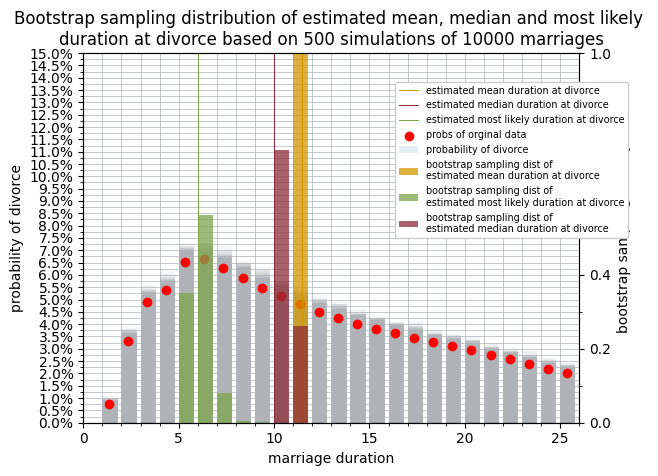

In [13]:
num_simulations = 100
batch_size = 10000

means, medians, most_probables, estimates = Bt.bootstrap(num_simulations, batch_size, durations_corrected, probs_per_duration)

fig, ax = plt.subplots()

ax.axvline(mean, color=rgb.tue_orange, lw=0.75, label="estimated mean duration at divorce")
ax.axvline(median, color=rgb.tue_red, lw=0.75, label="estimated median duration at divorce")
ax.axvline(mode, color=rgb.tue_green, lw=0.75, label="estimated most likely duration at divorce")


for i in np.arange(num_simulations):
    ax.bar(durations_corrected, height=estimates[i, :] * 100, width=0.8, color=rgb.tue_gray, lw=0.5,
           alpha=0.1, align="edge")

ax2 = ax.twinx()
ax2.hist(means, bins=durations_corrected, color=rgb.tue_orange, lw=0.5, width=0.8, alpha=0.75,
         label="bootstrap sampling dist of \nestimated mean duration at divorce", align="mid", density=True)
ax2.hist(most_probables, bins=durations_corrected, color=rgb.tue_green, lw=0.5, width=0.8, alpha=0.75,
         label="bootstrap sampling dist of \nestimated most likely duration at divorce", align="mid", density=True)
ax2.hist(medians, bins=durations_corrected, color=rgb.tue_red, lw=0.5, width=0.8, alpha=0.75,
         label="bootstrap sampling dist of \nestimated median duration at divorce", align="mid", density=True)
ax2.set_ylim([0, 1])
ax2.yaxis.set_major_locator(plt.MultipleLocator(0.2))
ax2.yaxis.set_minor_locator(plt.MultipleLocator(0.1))
ax2.set_ylabel("bootstrap sampling density")

ax.scatter(durations_corrected + 0.35, probs_per_duration * 100, color='red', label="probs of orginal data")
ax.bar(durations_corrected, probs_per_duration, width=0.8, color=rgb.tue_blue, lw=0.5,
       alpha=0.1, label="probability of divorce", align="edge")

ax.set_xlabel("marriage duration")
ax.set_ylabel("probability of divorce")
ax.set_ylim([0, 15])
ax.yaxis.set_major_locator(plt.MultipleLocator(.5))
ax.yaxis.set_minor_locator(plt.MultipleLocator(.25))
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, loc: f"{x:,.1f}%"))
ax.xaxis.set_major_locator(plt.MultipleLocator(5))
ax.xaxis.set_minor_locator(plt.MultipleLocator(1))

ax.grid(axis="both", which="both", color=rgb.tue_gray, linewidth=0.5)
ax.set_axisbelow(True)
fig.legend(loc=[0.6, 0.5], framealpha=1, facecolor="white", frameon=True, fontsize="x-small")
ax.set_title(f"Bootstrap sampling distribution of estimated mean, median and most likely \nduration at divorce based on "
             f"{num_simulations} simulations of {batch_size} marriages")
ax.set_xlim([0, 26])

plt.show()

100%|██████████| 100/100 [00:00<00:00, 2780.19it/s]


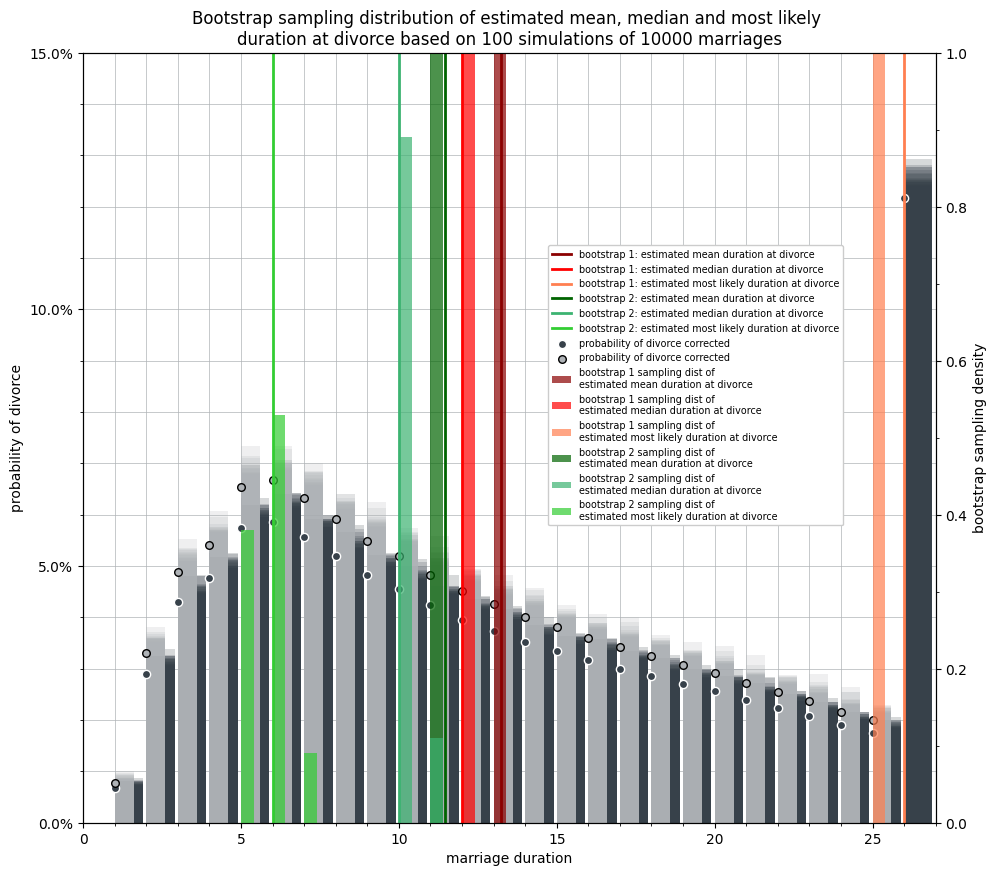

In [17]:
num_simulations = 100
batch_size = 10000

''' first bootstrap: uncorrected data '''
data_array1, years1, durations1, kids1 = dataloader.load_data()

data_array1 = data_array1.swapaxes(0, 1).sum(axis=2).sum(1)
sum_all_divs1 = data_array1.sum()
probs_per_duration1 = data_array1 / sum_all_divs1

assert np.sum(probs_per_duration1) == 1, "does not sum to one"

mean1 = np.sum(durations1 * probs_per_duration1)
median1 = durations1[np.argmax(np.cumsum(probs_per_duration1) >= 0.5)]
most_likely1 = durations1[np.argmax(probs_per_duration1)]  # mode of the distribution

means1, medians1, most_probables1, estimates1 = Bt.bootstrap(num_simulations, batch_size, durations1, probs_per_duration1)


''' second bootstrap: corrected data '''
data_array2, years2, durations2, kids2 = dataloader.load_data(durations_to_drop=[26])


data_array2 = data_array2.swapaxes(0, 1).sum(axis=2).sum(1)
sum_all_divs2 = data_array2.sum()
probs_per_duration2 = data_array2 / sum_all_divs2

assert np.sum(probs_per_duration2) == 1, "does not sum to one"

mean2 = np.sum(durations2 * probs_per_duration2)
median2 = durations2[np.argmax(np.cumsum(probs_per_duration2) >= 0.5)]
most_likely2 = durations2[np.argmax(probs_per_duration2)]  # mode of the distribution

means2, medians2, most_probables2, estimates2 = Bt.bootstrap(num_simulations, batch_size, durations2, probs_per_duration2)


''' Plotting the two bootstraps '''
fig, ax = plt.subplots(figsize=[11,10])

# bootstrap 1
ax.axvline(mean1, color=mcolors.CSS4_COLORS['darkred'], lw=2, label="bootstrap 1: estimated mean duration at divorce")
ax.axvline(median1, color=mcolors.CSS4_COLORS['red'], lw=2, label="bootstrap 1: estimated median duration at divorce")
ax.axvline(most_likely1, color=mcolors.CSS4_COLORS['coral'], lw=2, label="bootstrap 1: estimated most likely duration at divorce")

for i in np.arange(num_simulations):
    ax.bar(np.array(durations1), height=estimates1[i, :] * 100, width=0.9, color=rgb.tue_dark, lw=0.5,
           alpha=0.2, align="edge")

ax2 = ax.twinx()
ax2.hist(means1, bins=np.array(durations1), color=mcolors.CSS4_COLORS['darkred'], lw=0, width=0.4, alpha=0.70,
         label="bootstrap 1 sampling dist of \nestimated mean duration at divorce", align="mid", density=True)
ax2.hist(medians1, bins=np.array(durations1), color=mcolors.CSS4_COLORS['red'], lw=0, width=0.4, alpha=0.70,
         label="bootstrap 1 sampling dist of \nestimated median duration at divorce", align="mid", density=True)
ax2.hist(most_probables1, bins=np.array(durations1), color=mcolors.CSS4_COLORS['coral'], lw=0, width=0.4, alpha=0.70,
         label="bootstrap 1 sampling dist of \nestimated most likely duration at divorce", align="mid", density=True)

# bootstrap 2
ax.axvline(mean2, color=mcolors.CSS4_COLORS['darkgreen'], lw=2, label="bootstrap 2: estimated mean duration at divorce")
ax.axvline(median2, color=mcolors.CSS4_COLORS['mediumseagreen'], lw=2, label="bootstrap 2: estimated median duration at divorce")
ax.axvline(most_likely2, color=mcolors.CSS4_COLORS['limegreen'], lw=2, label="bootstrap 2: estimated most likely duration at divorce")

for i in np.arange(num_simulations):
    ax.bar(np.array(durations2), height=estimates2[i, :] * 100, width=0.6, color=rgb.tue_gray, lw=0.5,
           alpha=0.2, align="edge")


ax2.hist(means2, bins=np.array(durations2), color=mcolors.CSS4_COLORS['darkgreen'], lw=0.0, width=0.4, alpha=0.70,
         label="bootstrap 2 sampling dist of \nestimated mean duration at divorce", align="mid", density=True)
ax2.hist(medians2, bins=np.array(durations2), color=mcolors.CSS4_COLORS['mediumseagreen'], lw=0.0, width=0.4, alpha=0.70,
         label="bootstrap 2 sampling dist of \nestimated median duration at divorce", align="mid", density=True)
ax2.hist(most_probables2, bins=np.array(durations2), color=mcolors.CSS4_COLORS['limegreen'], lw=0.0, width=0.4, alpha=0.70,
         label="bootstrap 2 sampling dist of \nestimated most likely duration at divorce", align="mid", density=True)

ax.scatter(np.array(durations1), probs_per_duration1 * 100, color=rgb.tue_dark, label="probability of divorce corrected", edgecolor='white', s=35)
ax.scatter(np.array(durations2), probs_per_duration2 * 100, color=rgb.tue_gray, label="probability of divorce corrected", edgecolor='black', s=30)

ax.set_xlabel("marriage duration")
ax.set_ylabel("probability of divorce")
ax.set_xlim([0, 27])
ax.set_ylim([0, 15])
ax.yaxis.set_major_locator(plt.MultipleLocator(5))
ax.yaxis.set_minor_locator(plt.MultipleLocator(1))
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, loc: f"{x:,.1f}%"))
ax.xaxis.set_major_locator(plt.MultipleLocator(5))
ax.xaxis.set_minor_locator(plt.MultipleLocator(1))

ax2.set_ylim([0, 1])
ax2.yaxis.set_major_locator(plt.MultipleLocator(0.2))
ax2.yaxis.set_minor_locator(plt.MultipleLocator(0.1))
ax2.set_ylabel("bootstrap sampling density")

ax.grid(axis="both", which="both", color=rgb.tue_gray, linewidth=0.5)
ax.set_axisbelow(True)
fig.legend(loc=[0.55, 0.4], framealpha=1, facecolor="white", frameon=True, fontsize="x-small")
ax.set_title(f"Bootstrap sampling distribution of estimated mean, median and most likely \nduration at divorce based on "
             f"{num_simulations} simulations of {batch_size} marriages")

plt.show()







The estimates match with the bootstrap. But does this hold for all divorces or is it dependent on how many kids 
couples have?